In [1]:
import pandas as pd
import numpy as np

In [5]:
pd.__version__

'1.4.2'

In [6]:
import matplotlib.pyplot as plt

In [130]:
import seaborn as sns

In [131]:
sns.set_style('whitegrid')

In [73]:
temp = pd.read_pickle('df_of_imdb_data.pkl')

In [74]:
temp['rating'] = temp['rating'].apply(lambda x: x if type(x) == float else np.nan)

In [75]:
temp['runtimes'] = temp['runtimes'].apply(lambda x: int(x[0]) if type(x[0]) == str else np.nan)

In [92]:
temp['metascore'] = temp['metascore'].apply(lambda x: int(x['data']['metascore']) if 'metascore' in x['data'].keys() else np.nan)

In [94]:
temp

,imdb_id,titles,year,original_air_date,countries,language,genres,certificates,rating,votes,color_info,runtimes,box_office,producers,directors,production_company,distributors,metascore,is_nominee
0,0388130,Initial D: Third Stage,2001,13 Jan 2001 (Japan),[Japan],"[en, ja, cmn]","[Animation, Action, Romance, Sport]","[Australia:PG, Japan:G, United States:TV-PG]",7.6,1390,[Color],100,[],[2246748],"[1245306, 1564830]","[0179653, 0021660, 0099762, 0113955, 0036168]","[0179653, 0053157, 0039940, 0921883]",NaN,0
1,0273772,Don't Make Trouble!,2001,17 Jan 2001 (France),[France],"[fr, ar]","[Animation, Drama, Comedy]",[France:Tous publics],6.6,49,[Color],70,[],"[1007620, 0099748, 0501590, 0851724]","[0002174, 0071117, 0099379, 0181117, 0216816, ...","[0072738, 0069857]",[0038517],NaN,0
2,0243017,Waking Life,2001,07 Mar 2002 (Australia),[United States],[en],"[Animation, Drama, Fantasy]","[Argentina:13, Australia:M, Brazil:Livre, Cana...",7.7,63692,[Color],99,"{'Opening Weekend United States': '$88,977, 21...","[0438210, 0657921, 0782270, 0806189, 0808819, ...",[0000500],"[0028932, 0046530, 0042682, 0054189, 0123642, ...","[0000756, 0028932, 0007180, 0125154, 0067533, ...",83.0,0
3,0291559,Wave Twisters,2001,[],[United States],[en],"[Animation, Adventure, Musical, Sci-Fi]",[United States:Unrated],7.4,551,[Color],46,[],[1029039],"[1000898, 1037263]",[0060259],[],NaN,0
4,0277909,Mutant Aliens,2001,09 Jan 2002 (France),[United States],[en],"[Animation, Comedy, Sci-Fi]","[France:Tous publics, Germany:16, South Korea:...",6.6,1204,[Color],81,"{'Budget': '$200,000 (estimated)'}","[0390350, 0687739]",[0687739],[0077590],"[0068070, 0112126, 0084806]",39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,13779394,"The Absurd, Surreal, Metaphysical and Fracture...",2021,2021 (USA),[United States],[en],[Animation],[],6.6,7,[Color],70,[],"[12204221, 12181537]",[12181537],[0838858],[],NaN,0
3897,14489118,Gekijouban Dakaretai Otoko 1-i ni Odosarete Im...,2021,2021 (Japan),[Japan],[ja],[Animation],[Philippines:PG-13::(self-applied)],7.7,16,[Color],78,[],[],[3550885],[],[],NaN,0
3898,15421206,Scufita Rosie,2021,[],[Romania],[ro],"[Animation, Family]",[Romania:A.G.],NaN,[],[Color::(Full HD)],60,[],[],[12934125],[0880385],[0880385],NaN,0
3899,15764078,Marriage on Fire,2021,[],[United States],[en],"[Animation, Comedy]",[],NaN,[],[Color::(Full HD)],90,[],[13062559],[11675032],"[0887942, 0445486]",[],NaN,0


In [95]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [98]:
imdb_train, imdb_test = train_test_split(temp, test_size=0.2, shuffle=True, stratify=temp['is_nominee'], random_state=126029)

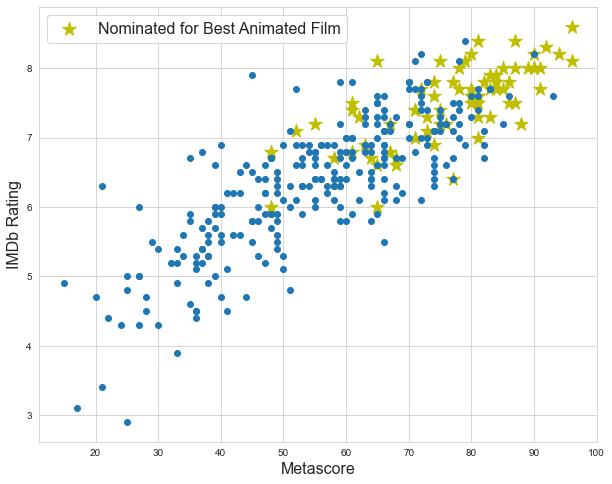

In [144]:
plt.figure(figsize=(10,8))
plt.scatter(imdb_train['metascore'].loc[imdb_train['is_nominee']==1], 
            imdb_train['rating'].loc[imdb_train['is_nominee']==1], 
            color='y', marker='*', s=200, label='Nominated for Best Animated Film')
plt.scatter(imdb_train['metascore'].loc[imdb_train['is_nominee']==0], 
            imdb_train['rating'].loc[imdb_train['is_nominee']==0])
plt.xlabel('Metascore', fontsize=16)
plt.ylabel('IMDb Rating', fontsize=16)
plt.legend(fontsize=16)
plt.show()

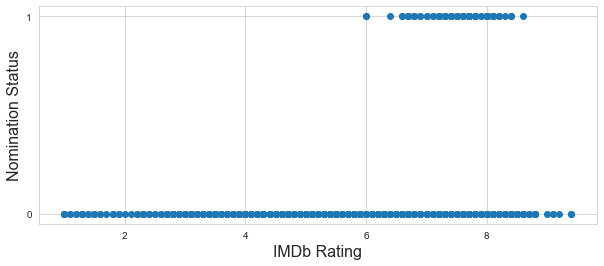

In [135]:
plt.figure(figsize=(10,4))
plt.scatter(imdb_train['rating'], imdb_train['is_nominee'])
plt.xlabel('IMDb Rating', fontsize=16)
plt.ylabel('Nomination Status', fontsize=16)
plt.locator_params(axis='y', nbins=2)
plt.show()

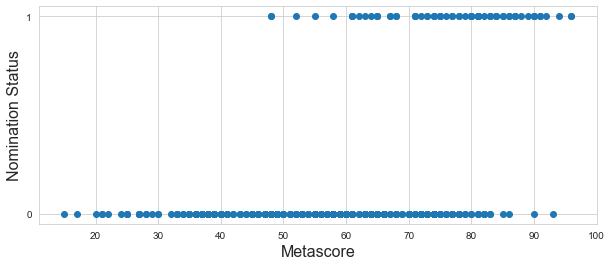

In [140]:
plt.figure(figsize=(10,4))
plt.scatter(imdb_train['metascore'], imdb_train['is_nominee'])
plt.xlabel('Metascore', fontsize=16)
plt.ylabel('Nomination Status', fontsize=16)
plt.locator_params(axis='y', nbins=2)
plt.show()

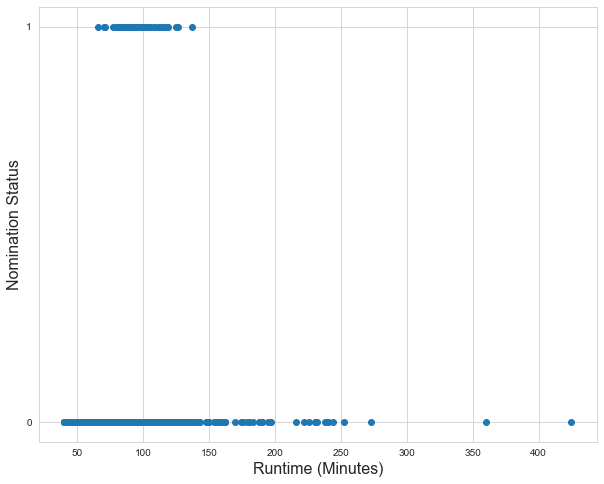

In [152]:
plt.figure(figsize=(10,8))
plt.scatter(imdb_train['runtimes'], imdb_train['is_nominee'])
plt.xlabel('Runtime (Minutes)', fontsize=16)
plt.ylabel('Nomination Status', fontsize=16)
plt.locator_params(axis='y', nbins=2)
plt.show()

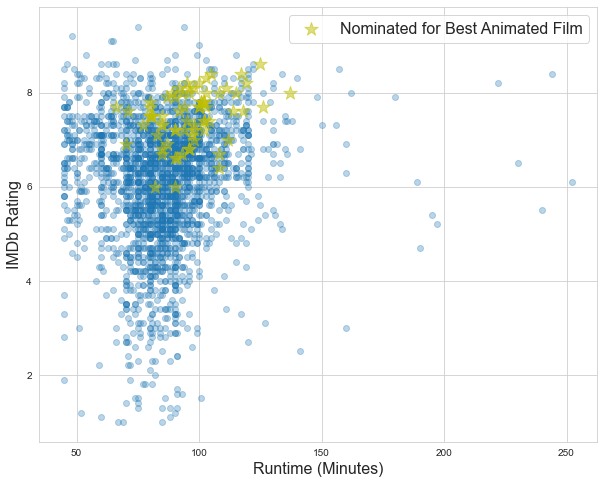

In [151]:
plt.figure(figsize=(10,8))

plt.scatter(imdb_train['runtimes'].loc[imdb_train['is_nominee']==0], 
            imdb_train['rating'].loc[imdb_train['is_nominee']==0], alpha=0.3)

plt.scatter(imdb_train['runtimes'].loc[imdb_train['is_nominee']==1], 
            imdb_train['rating'].loc[imdb_train['is_nominee']==1], 
            color='y', marker='*', s=200, label='Nominated for Best Animated Film',
            alpha=0.5)

plt.xlabel('Runtime (Minutes)', fontsize=16)
plt.ylabel('IMDb Rating', fontsize=16)
plt.legend(fontsize=16)
plt.show()